In [11]:
import numpy as np
from typing import Iterator, Tuple

def gen_over(X: np.ndarray, Y: np.ndarray, window_size: int, normal_step: int, small_step: int, batch_size: int) -> Iterator[Tuple[np.ndarray, np.ndarray]]:
    indices = np.arange(len(Y))
    
    while True:  # 무한 반복
        X_batch = []
        Y_batch = []

        for _ in range(batch_size):
            # 레이블 1 선택 확률을 높임
            if np.random.rand() < 0.1:  # 레이블 0 선택 확률
                index = np.random.choice(indices[window_size - 1:len(Y) - window_size: normal_step])
            else:  # 레이블 1 선택 확률
                class_1_indices = np.where(Y.flatten() == 1)[0]
                valid_indices = [idx for idx in class_1_indices if idx >= window_size - 1]
                index = np.random.choice(valid_indices[::small_step])

            # 윈도우 범위 조정
            start_idx = max(index - window_size + 1, 0)
            end_idx = index + 1

            # X, Y 배치에 추가
            X_batch.append(X[start_idx:end_idx])
            Y_batch.append(Y[index])

        yield np.array(X_batch), np.array(Y_batch)

# 예시 매개변수 값
window_size = 300
normal_step = 300
small_step = 30
batch_size = 32
# 예시 데이터 생성
X = np.random.rand(60000, 5)
Y = np.random.randint(60000, 1)

# 데이터 제너레이터 생성
balanced_data_gen = gen_over(X, Y, window_size, normal_step, small_step, batch_size)


ValueError: low >= high

In [12]:
import numpy as np
from typing import Iterator, Tuple

def gen_over(X: np.ndarray, Y: np.ndarray, window_size: int, normal_step: int, small_step: int, batch_size: int) -> Iterator[Tuple[np.ndarray, np.ndarray]]:
    indices = np.arange(len(Y))
    
    while True:  # 무한 반복
        X_batch = []
        Y_batch = []

        for _ in range(batch_size):
            # 이상 데이터 선택 확률을 높임
            if np.random.rand() < 0.1:  # 정상 데이터 선택 확률
                index = np.random.choice(indices[window_size - 1:len(Y) - window_size: normal_step])
            else:  # 이상 데이터 선택 확률
                anomaly_indices = np.where(Y.flatten() == 1)[0]
                valid_indices = [idx for idx in anomaly_indices if idx >= window_size - 1]
                index = np.random.choice(valid_indices[::small_step])

            # 윈도우 범위 조정
            start_idx = max(index - window_size + 1, 0)
            end_idx = index + 1

            # X, Y 배치에 추가
            X_batch.append(X[start_idx:end_idx])
            Y_batch.append(Y[index])

        yield np.array(X_batch), np.array(Y_batch)

# 예시 데이터 생성
np.random.seed(0)  # 결과의 일관성을 위해 시드 설정
X = np.random.rand(1000, 5)  # 1000개의 샘플, 각 샘플은 5개의 특성을 가짐
Y = np.zeros(1000)  # 대부분의 샘플은 정상
Y[np.random.choice(1000, 100, replace=False)] = 1  # 약 10%의 샘플을 이상으로 설정

# 제너레이터 매개변수 설정
window_size = 10
normal_step = 10
small_step = 2
batch_size = 32

# 데이터 제너레이터 생성
anomaly_data_gen = gen_over(X, Y, window_size, normal_step, small_step, batch_size)

# 제너레이터에서 첫 번째 배치 추출 및 출력 (테스트용)
first_batch_X, first_batch_Y = next(anomaly_data_gen)
first_batch_X.shape, first_batch_Y.shape, first_batch_Y[:10]  # 첫 10개의 레이블 확인



((32, 10, 5), (32,), array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1.]))

In [2]:
import pandas as pd
temp = pd.read_csv(r'1hz_data\1hzdata\0822_0902_1hz.csv')

In [9]:
temp

,Time,x,y,z
0,2023.08.22 15:26:18.991,-0.033353,-0.007399,-0.007402
1,2023.08.22 15:26:19.989,-0.033386,-0.007403,-0.007393
2,2023.08.22 15:26:20.987,-0.034551,-0.007400,-0.007404
3,2023.08.22 15:26:21.985,-0.033582,-0.007401,-0.007397
4,2023.08.22 15:26:22.987,-0.033846,-0.007405,-0.007406
...,...,...,...,...
1110455,2023.09.04 15:28:01.327,-0.007479,-0.006328,-0.007035
1110456,2023.09.04 15:28:02.325,-0.007446,-0.006378,-0.004523
1110457,2023.09.04 15:28:03.331,-0.007509,-0.006344,-0.005129
1110458,2023.09.04 15:28:04.333,-0.007664,-0.006430,-0.005698


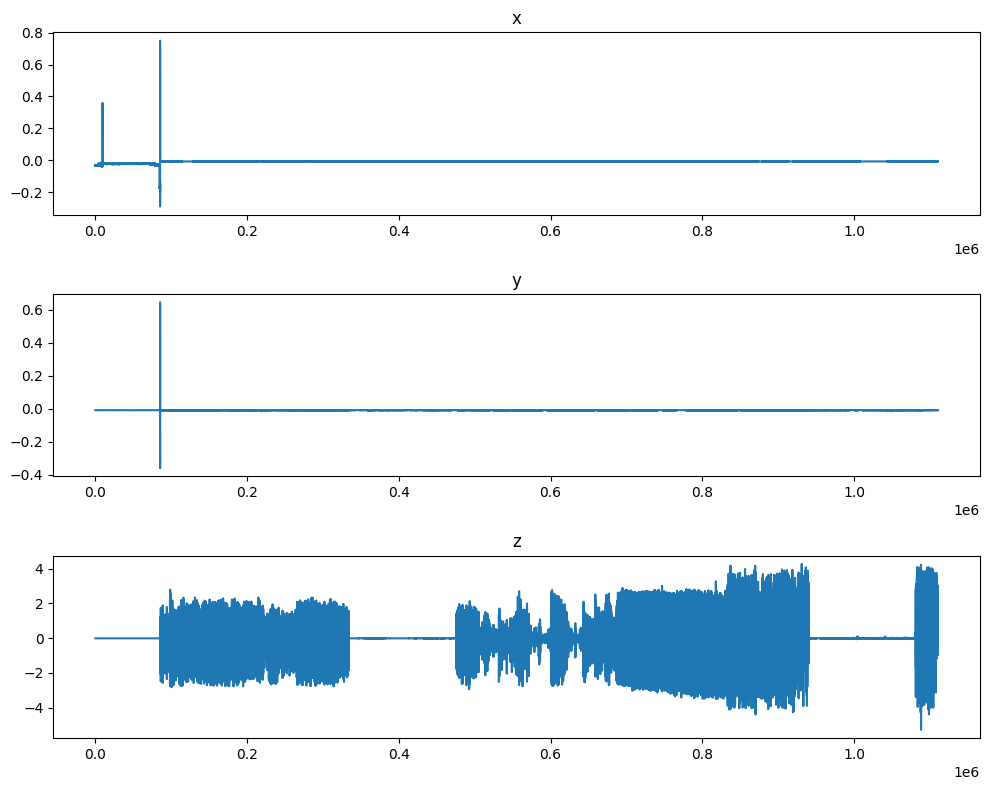

In [8]:
columns = temp.columns[1:]
columns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 8)) 

for i, column in enumerate(columns):
    axs[i].plot(temp[column])
    axs[i].set_title(column)

plt.tight_layout()  # 그래프 간격 조정
plt.show()